In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file with the data and place it in a Dataframe
Data_1 = pd.read_csv("Time_Data1.csv")
# drop the empty cells of data
Data_1 = Data_1.dropna(axis='columns')
# show only the first three columns
Data_1 = Data_1.iloc[:,0:3]
# Show the dataframe
#Data_1

In [363]:
# create a read_time_string function that takes 's' as an argument
def read_time_string(s):
    # split the 's' argument by the spaces and place in a column called times as an array
    times = s.split()
    # define four variables and set to 0
    days,hours,mins,secs = 0,0,0,0
    # for loop that goes through the entire times column array and checks whether each element should be put in a days, hours, minutes, or seconds column
    for i in range(len(times)-1):
        # check whether the element is equal to 'days', change the string to an int and place it in a days variable
        if times[i+1] == 'days':
            days = int(times[i])
        # check whether the element is equal to 'hours', change the string to an int and place it in a hours variable
        if times[i+1] == 'hours':
            hours = int(times[i])
        # check whether the element is equal to 'minutes', change the string to an int and place it in a minutes variable
        if times[i+1] == 'minutes':
            mins = int(times[i])
        # check whether the element is equal to 'seconds', change the string to an int and place it in a days variable
        if times[i+1] == 'seconds':
            secs = int(times[i])
    # Calulate the total seconds of each row it took to open the email
    total = secs + (mins*60) + (hours*3600) + (days*86400)
    return days,hours,mins,secs,total

In [364]:
# initialize four new variables equal to empty lists
Days,Hours,Mins,Secs,total_time = [],[],[],[],[]
# for loop to go through the column 'Time to Open'
for x in Data_1['Time to Open']:
    # set new variables equal to the data given when you call the read_time_string function
    d,h,m,s,t = read_time_string(x)
    # Add elements in variable d to the end of the Days list
    Days.append(d)
    # Add elements in variable h to the end of the Hours list
    Hours.append(h)
    # Add elements in variable m to the end of the Mins list
    Mins.append(m)
    # Add elements in variable s to the end of the Secs list
    Secs.append(s)
    # Add elements in variable t to the end of the totaL_time list
    total_time.append(int(t))

# Add the Days column to the original Data_1 dataframe    
Data_1['Days'] = pd.Series(Days)
# Add the Hours column to the original Data_1 dataframe 
Data_1['Hours'] = pd.Series(Hours)
# Add the Mins column to the original Data_1 dataframe 
Data_1['Mins'] = pd.Series(Mins)
# Add the Secs column to the original Data_1 dataframe 
Data_1['Secs'] = pd.Series(Secs)
# Add the total_time column to the original Data_1 dataframe 
Data_1['Total Seconds'] = pd.Series(total_time)

# define new function analyze that takes in a row as an argument
def analyze10(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] < 10:
        # return True if < 10 seconds
        return True
    # return False if > 10 seconds
    return False

# define new function analyze that takes in a row as an argument
def analyze20(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] <= 20 & row['Total Seconds'] >= 10:
        # return True if <= 10 seconds
        return True
    # return False if > 10 seconds
    return False

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Definitely a Bot'] = Data_1.apply(lambda row: analyze10(row),axis=1)

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Probably a Bot'] = Data_1.apply(lambda row: analyze20(row),axis=1)

# print Data_1 to check that it worked
#print(Data_1.head())

In [365]:
# create a new column with the split data
Data_1['Split'] = Data_1.Email.str.split('@')

# create a function that splits the email addresses and keeps only the part after the @ sign
def split_email(x):
   return x.split("@")[1]

# create a new column called Provider and place all of the split email providers in it
Data_1["Provider"] = Data_1["Email"].apply(split_email)

In [366]:
# Print out the amount of times each email provider was sent an email
#Data_1["Provider"].value_counts()
#Data_2 = Data_1["Provider"]
#print(Data_2)
#Data_3 = Data_2.str.lower()
Data_3.value_counts()
#Data_2["Provider"].value_counts()


yahoo.com                   122
hotmail.com                 107
gmail.com                    80
obu.edu                      45
aol.com                      44
comcast.net                  26
msn.com                      20
sbcglobal.net                13
outlook.com                  11
me.com                       11
live.com                     10
pivotphysicaltherapy.com     10
att.net                       8
cox.net                       8
mac.com                       8
psu.edu                       7
msmary.edu                    7
verizon.net                   7
icloud.com                    6
linfield.edu                  5
highpoint.edu                 5
pacific.edu                   5
athletics.gatech.edu          4
yale.edu                      4
nn.k12.va.us                  4
saintleo.edu                  4
uark.edu                      4
winthrop.edu                  4
okstate.edu                   4
longwood.edu                  3
                           ... 
svusd.or

In [367]:
# create a list with the emails of those who are Definitely bots
dbot_email = Data_1.loc[Data_1["Definitely a Bot"] == True, "Email"]

# create a column for the email addresses of those who are definitely bots and split them
Data_1["Definitely a Bot Email Addresses"] = dbot_email.str.split('@')

# create a function to split the email addresses and keep only the part after the @ sign
def split_defemail(x):
   return x.split("@")[1]

# create a new column called Definitely a Bot Email Addresses and place all of the split email providers in it
Data_1["Definitely a Bot Email Addresses"] = Data_1.loc[Data_1["Definitely a Bot"] == True, "Email"].apply(split_defemail)

# Print out the amount of times each email provider was sent an email who are definitely bots
Data_1["Definitely a Bot Email Addresses"].value_counts()

obu.edu                     9
pivotphysicaltherapy.com    7
linfield.edu                4
msmary.edu                  4
nn.k12.va.us                3
highpoint.edu               3
unionps.org                 2
jenksps.org                 2
saintleo.edu                2
grandview.edu               2
episd.org                   2
dmhhs.org                   2
shawnee.edu                 1
stxavier.org                1
gmercyu.edu                 1
scc.losrios.edu             1
robeson.k12.nc.us           1
carlisleschools.org         1
BCPS.ORG                    1
osshealth.com               1
wsc.edu                     1
svusd.org                   1
waldorf.edu                 1
crawfordmh.org              1
sharylandisd.org            1
tatnall.org                 1
monmouth.edu                1
abington.k12.pa.us          1
mccd.edu                    1
walsh.edu                   1
ngu.edu                     1
cherokee1.org               1
pt360coop.com               1
sjrstate.e

In [368]:
# create a list with the emails of those who are probably bots
pbot_email = Data_1.loc[Data_1["Probably a Bot"] == True, "Email"]

# create a column for the email addresses of those who are probably bots and split them
Data_1["Probably a Bot Email Addresses"] = pbot_email.str.split('@')

# create a function to split the email addresses and keep only the part after the @ sign
def split_probemail(x):
   return x.split("@")[1]

# create a new column called Definitely a Bot Email Addresses and place all of the split email providers in it
Data_1["Probably a Bot Email Addresses"] = Data_1.loc[Data_1["Probably a Bot"] == True, "Email"].apply(split_probemail)

# Print out the amount of times each email provider was sent an email who are definitely bots
Data_1["Probably a Bot Email Addresses"].value_counts()

hotmail.com          1
saintleo.edu         1
missouridelta.com    1
crawfordmh.org       1
waldorf.edu          1
Name: Probably a Bot Email Addresses, dtype: int64

In [369]:
# calculate the total amount of trues in the Bots column
total_true = np.sum(Data_1['Definitely a Bot'])
# calculate the total amount of falses in the Bots column
total_false = len(Data_1['Definitely a Bot'])-total_true

# calculate the total amount of trues in the Bots column
total_true2 = np.sum(Data_1['Probably a Bot'])
# calculate the total amount of falses in the Bots column
total_false2 = len(Data_1['Probably a Bot'])-total_true2

print(total_true)
print(total_false)

print(total_true2)
print(total_false2)


78
953
5
1026


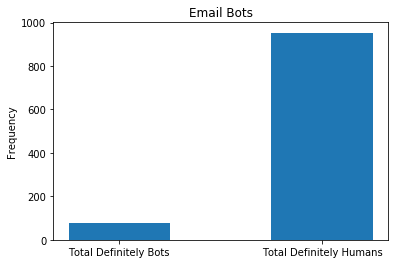

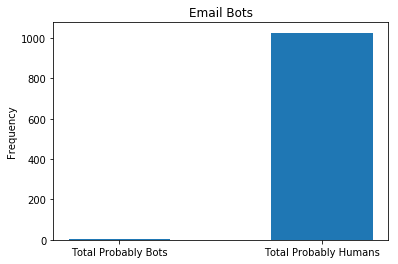

In [370]:
plt.bar([1,2],[total_true,total_false],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Definitely Bots','Total Definitely Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()

plt.bar([1,2],[total_true2,total_false2],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Probably Bots','Total Probably Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()

In [371]:
Data_1.Provider.str.lower()


0             hotmail.com
1               yahoo.com
2       robeson.k12.nc.us
3              uidaho.edu
4                 msn.com
5               yahoo.com
6              klaben.com
7                 psu.edu
8               gmail.com
9               altru.org
10                byu.edu
11            hotmail.com
12              yahoo.com
13          lafayette.edu
14              yahoo.com
15                 ou.edu
16                gmu.edu
17          debkimmet.com
18               utep.edu
19              yahoo.com
20            hotmail.com
21         enhancedfp.com
22                att.net
23              gmail.com
24              yahoo.com
25              yahoo.com
26      huntsman.utah.edu
27            okstate.edu
28              yahoo.com
29                ysu.edu
              ...        
1001           transy.edu
1002          hutchcc.edu
1003            dixie.edu
1004          neumann.edu
1005         newhaven.edu
1006      scc.losrios.edu
1007            yahoo.com
1008       h

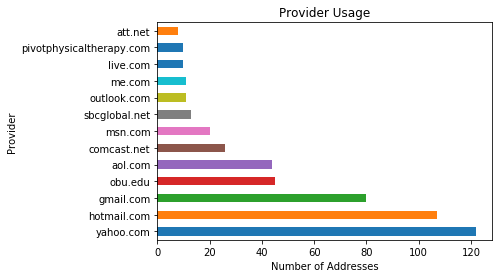

In [372]:
# Plotting the number of emails from the list in top 13 used providers
Data_3.value_counts()[0:13].plot(kind='barh')
plt.xlabel('Number of Addresses')
plt.ylabel('Provider')
plt.title('Provider Usage')
plt.show()

In [373]:
# create a new column with the split data
Data_1['Split'] = Data_1.Provider.str.split('.')

# create a function that splits the provider and keeps only the part after the '.' sign
def split_provider(x):
   return x.split(".")[1]

# create a new column called Provider and place all of the split email providers in it
Data_1["Email_End"] = Data_1["Provider"].apply(split_provider)

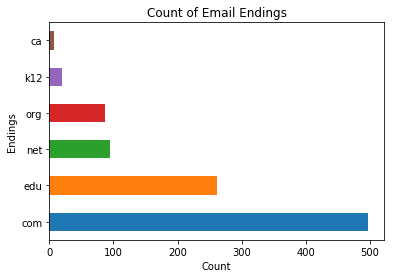

In [374]:
Email_End_2 = Data_1['Email_End'].str.lower()
# Plotted the different endings to emails such as -com or -edu to see the dispersion amongst the data
Email_End_2.value_counts()[0:6].plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Endings')
plt.title('Count of Email Endings')
plt.show()

In [375]:
# Seperated each of the major providers into their own specific data frames to make analysis easier.
yahoo = Data_1[Data_1['Provider']== "yahoo.com"]
hotmail = Data_1[Data_1['Provider']=='hotmail.com']
gmail = Data_1[Data_1['Provider']=='gmail.com']
obu = Data_1[Data_1['Provider']=='obu.edu']
aol = Data_1[Data_1['Provider']=='aol.com']
comcast = Data_1[Data_1['Provider']=='comcast.net']
msn = Data_1[Data_1['Provider']=='msn.com']
sbcglobal = Data_1[Data_1['Provider']=='sbcglobal.net']
outlook = Data_1[Data_1['Provider']=='outlook.com']
me = Data_1[Data_1['Provider']=='me.com']
live = Data_1[Data_1['Provider']=='live.com']
pivotphysical = Data_1[Data_1['Provider']=="pivotphysicaltherapy.com"]
att = Data_1[Data_1['Provider']=='att.net']

In [376]:
yahoo_bots = yahoo[yahoo['Definitely a Bot']== False]

In [377]:
obu_bots = obu[obu['Definitely a Bot']== True]
print(obu_bots.count())

Email                               9
Date Accessed                       9
Time to Open                        9
Days                                9
Hours                               9
Mins                                9
Secs                                9
Total Seconds                       9
Definitely a Bot                    9
Probably a Bot                      9
Split                               9
Provider                            9
Definitely a Bot Email Addresses    9
Probably a Bot Email Addresses      0
Email_End                           9
dtype: int64


In [378]:
obu_prob_bot = obu[obu['Probably a Bot']== True]
print(obu_prob_bot.count())

Email                               0
Date Accessed                       0
Time to Open                        0
Days                                0
Hours                               0
Mins                                0
Secs                                0
Total Seconds                       0
Definitely a Bot                    0
Probably a Bot                      0
Split                               0
Provider                            0
Definitely a Bot Email Addresses    0
Probably a Bot Email Addresses      0
Email_End                           0
dtype: int64


In [379]:
obu_no_bot = obu.count() - obu_bots.count() - obu_prob_bot.count()
print(obu_no_bot)

Email                               36
Date Accessed                       36
Time to Open                        36
Days                                36
Hours                               36
Mins                                36
Secs                                36
Total Seconds                       36
Definitely a Bot                    36
Probably a Bot                      36
Split                               36
Provider                            36
Definitely a Bot Email Addresses     0
Probably a Bot Email Addresses       0
Email_End                           36
dtype: int64


In [380]:
obu

,Email,Date Accessed,Time to Open,Days,Hours,Mins,Secs,Total Seconds,Definitely a Bot,Probably a Bot,Split,Provider,Definitely a Bot Email Addresses,Probably a Bot Email Addresses,Email_End
509,col61041@obu.edu,10/10/18 12:32,10 seconds,0,0,0,10,10,False,False,"[obu, edu]",obu.edu,NaN,NaN,edu
540,abr60629@obu.edu,10/10/18 12:49,18 minutes 26 seconds,0,0,18,26,1106,False,False,"[obu, edu]",obu.edu,NaN,NaN,edu
542,phi59300@obu.edu,10/10/18 12:31,07 seconds,0,0,0,7,7,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
573,BEG63812@obu.edu,10/10/18 12:28,06 seconds,0,0,0,6,6,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
574,kel63081@obu.edu,10/10/18 12:27,02 seconds,0,0,0,2,2,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
575,laz63271@obu.edu,10/10/18 12:28,04 seconds,0,0,0,4,4,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
576,owe63815@obu.edu,10/10/18 12:28,04 seconds,0,0,0,4,4,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
577,pea63821@obu.edu,10/10/18 12:28,03 seconds,0,0,0,3,3,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
580,tro63093@obu.edu,10/10/18 12:28,04 seconds,0,0,0,4,4,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu
818,rao65610@obu.edu,10/10/18 12:09,03 seconds,0,0,0,3,3,True,False,"[obu, edu]",obu.edu,obu.edu,NaN,edu


In [381]:
providers = pd.DataFrame(columns=['Provider', 'Definitely a Bot', 'Probably a Bot', 'Not a Bot'])


In [382]:
providers['Provider'] = ['yahoo', 'hotmail', 'gmail', 'obu', 'aol', 'comcast', 'msn', 'sbcglobal', 'outlook', 'me', 'live', 'pivotphysical', 'att']
print(providers)

         Provider Definitely a Bot Probably a Bot Not a Bot
0           yahoo              NaN            NaN       NaN
1         hotmail              NaN            NaN       NaN
2           gmail              NaN            NaN       NaN
3             obu              NaN            NaN       NaN
4             aol              NaN            NaN       NaN
5         comcast              NaN            NaN       NaN
6             msn              NaN            NaN       NaN
7       sbcglobal              NaN            NaN       NaN
8         outlook              NaN            NaN       NaN
9              me              NaN            NaN       NaN
10           live              NaN            NaN       NaN
11  pivotphysical              NaN            NaN       NaN
12            att              NaN            NaN       NaN


In [383]:
#providers['Definitely a Bot'] = providers[['Provider'][8]== True].count()
#print(providers)
providers[['Provider'][8]== True]

IndexError: list index out of range

In [384]:
group_by_provider = Data_1.groupby('Provider'), [('Definitely a Bot' == True).count()]

AttributeError: 'bool' object has no attribute 'count'

In [385]:
print(group_by_provider)

(<pandas.core.groupby.groupby.DataFrameGroupBy object at 0x7fddc776a198>, [False])


In [403]:
# define new function analyze that takes in a row as an argument
def analyze11(row):
#If statement to categorize Definitely Bots
    if row['Definitely a Bot'] == True:
        # return 'Definitely a Bot' if True
        return 'Definitely a Bot'
    # return False if > 10 seconds
    elif row['Probably a Bot'] == True:
        return 'Probably a Bot'
    else :
        return 'Not a Bot'

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Bot Classifier'] = Data_1.apply(lambda row: analyze11(row),axis=1)

# print Data_1 to check that it worked
Data_1

,Email,Date Accessed,Time to Open,Days,Hours,Mins,Secs,Total Seconds,Definitely a Bot,Probably a Bot,Split,Provider,Definitely a Bot Email Addresses,Probably a Bot Email Addresses,Email_End,Bot_Classifier,Bot Classifier
0,ccaso13@hotmail.com,10/10/18 14:12,2 hours 28 minutes 47 seconds,0,2,28,47,8927,False,False,"[hotmail, com]",hotmail.com,NaN,NaN,com,Definitely a Bot,Not a Bot
1,scubus1@yahoo.com,10/12/18 12:29,2 days 30 minutes 47 seconds,2,0,30,47,174647,False,False,"[yahoo, com]",yahoo.com,NaN,NaN,com,Definitely a Bot,Not a Bot
2,jeffery.kinlaw@robeson.k12.nc.us,10/10/18 11:56,04 seconds,0,0,0,4,4,True,False,"[robeson, k12, nc, us]",robeson.k12.nc.us,robeson.k12.nc.us,NaN,k12,Definitely a Bot,Definitely a Bot
3,bsteele@uidaho.edu,10/10/18 16:30,3 hours 54 minutes 56 seconds,0,3,54,56,14096,False,False,"[uidaho, edu]",uidaho.edu,NaN,NaN,edu,Definitely a Bot,Not a Bot
4,allstarpt@msn.com,10/10/18 16:34,4 hours 35 minutes 17 seconds,0,4,35,17,16517,False,False,"[msn, com]",msn.com,NaN,NaN,com,Definitely a Bot,Not a Bot
5,atcdig24@yahoo.com,10/10/18 12:30,5 minutes 57 seconds,0,0,5,57,357,False,False,"[yahoo, com]",yahoo.com,NaN,NaN,com,Definitely a Bot,Not a Bot
6,bbasista@klaben.com,10/11/18 8:02,20 hours 6 minutes 21 seconds,0,20,6,21,72381,False,False,"[klaben, com]",klaben.com,NaN,NaN,com,Definitely a Bot,Not a Bot
7,bfs6@psu.edu,10/10/18 13:55,1 hours 57 minutes 28 seconds,0,1,57,28,7048,False,False,"[psu, edu]",psu.edu,NaN,NaN,edu,Definitely a Bot,Not a Bot
8,blaronde@gmail.com,10/10/18 22:16,10 hours 17 minutes 57 seconds,0,10,17,57,37077,False,False,"[gmail, com]",gmail.com,NaN,NaN,com,Definitely a Bot,Not a Bot
9,bwestereng@altru.org,10/10/18 13:53,1 hours 58 minutes 37 seconds,0,1,58,37,7117,False,False,"[altru, org]",altru.org,NaN,NaN,org,Definitely a Bot,Not a Bot
